In [1]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip show numpy pandas scikit-learn

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [5]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [10]:
import nltk

In [11]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
imdb_data=pd.read_csv('IMDB Dataset.csv')

In [13]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [23]:
nltk.download('punkt')       # for tokenization
nltk.download('stopwords')   # for stop words
nltk.download('wordnet')     # for lemmatizer
nltk.download('averaged_perceptron_tagger')  # For word type tagging
nltk.download('omw-1.4')     # For more information on the WordNet lemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
#searching null values
print(imdb_data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [24]:
#cleaning text

import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # deleting HTML tag
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # deleting special char.
    text = text.lower()  # change to lower char.
    return text

imdb_data['clean_review']=imdb_data['review'].apply(clean_text)

In [25]:
imdb_data

,review,sentiment,clean_text,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter matteis love in the time of money is a ...
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,im going to have to disagree with the previous...


In [26]:
#Tokenization of texts

from nltk.tokenize import word_tokenize

imdb_data['tokens']=imdb_data['clean_review'].apply(clean_text)


In [27]:
#deleting stop words

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [28]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

def preprocess_tokens(tokens):
    return[stemmer.stem(word) for word in tokens if word not in stop_words]

imdb_data['preprocess_tokens'] = imdb_data['tokens'].apply(preprocess_tokens)

In [31]:
#analyzinggg

from collections import Counter

all_words = [word for tokens in imdb_data['preprocess_tokens'] for word in tokens]
word_freq = Counter(all_words)

print(word_freq.most_common(10))  # 10 most used words


[(' ', 11305214), ('e', 6098589), ('n', 3373044), ('r', 2860539), ('h', 2781171), ('l', 2250665), ('c', 1428994), ('u', 1363036), ('f', 1132485), ('g', 1063476)]


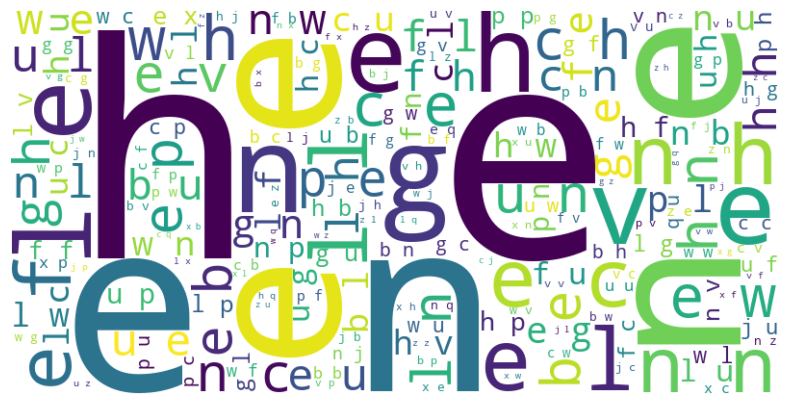

In [32]:
#visiualizng

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [34]:
#Preparation of data for the model

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(imdb_data['clean_review']).toarray()

y = imdb_data['sentiment']





In [35]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

<bound method Series.info of 0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object>

In [40]:
#Analysis with ML model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8491


In [49]:
# if  it is in the form y_test `positive` və `negative`, then we replace them with 1 və 0 
y_test_binary = [1 if label == 'positive' else 0 for label in y_test]
                 
y_pred_binary = [1 if label == 'positive' else 0 for label in y_pred]


positive_count = sum(y_test_binary)  # count of positive
negative_count = len(y_test_binary) - positive_count  # count of negative

print(f"Positive : {positive_count}")
print(f"Negative : {negative_count}")


Positive : 5039
Negative : 4961
